# Visualize stock value

In [1]:
from vnstock import *

## Use RNN for predict stock price next day.

In [2]:
stock_ls_analysis("VPB,TPB,SHB,EIB,MBB", lang='vi')

Mã CP,EIB,MBB,SHB,TPB,VPB
Vốn hóa (tỷ),33425,96721,41798,38969,158282
Giá,19200,18550,11550,17700,19950
Số phiên tăng/giảm liên tiếp,3,3,2,3,2
P/E,18.9,5.1,5.7,7.1,15.4
PEG,-0.5,0.6,-0.6,-0.8,-0.4
P/B,1.5,1.1,0.8,1.2,1.4
Cổ tức,0.0,0.034,0.0,0.0,0.059
ROE,0.084,0.239,0.161,0.174,0.103
ROA,0.009,0.026,0.013,0.017,0.015
interestMargin,0.026,0.055,0.036,0.037,0.059


In [3]:
from datetime import date, datetime, timedelta
import numpy as np

def fm_date(date):
    return date.strftime("%Y-%m-%d")

# Get list of dates for the last 365 days
def get_last_days(num_days):
    current_date = datetime.now()
    days_ago = current_date - timedelta(days=num_days)
    date_list = [days_ago + timedelta(days=i) for i in range(num_days)]
    # Format the dates as "%Y-%m-%d" and store them in a new list
    formatted_dates = [fm_date(date) for date in date_list]

    return formatted_dates


def get_stock_price(symbol, num_days):
    dates_train = get_last_days(num_days)
    df_his = stock_historical_data(symbol, dates_train[0], dates_train[len(dates_train) - 1], '1D', 'stock')
    return df_his



In [4]:
df_tpb = get_stock_price('TPB', 390)
print(df_tpb.head())

         time   open   high    low  close   volume ticker
0  2022-10-24  13010  13050  12110  13050  3261700    TPB
1  2022-10-25  12750  13370  12490  13050  3234600    TPB
2  2022-10-26  13080  13240  12820  12950  1128900    TPB
3  2022-10-27  12920  13590  12850  13590  4337200    TPB
4  2022-10-28  13730  13920  13370  13500  2784700    TPB


## MA 50 and MA 200

- Trend Identification:

50-day MA: This moving average represents the short-term trend. When the current price is above the 50-day MA, it suggests that the stock is in a short-term uptrend.
200-day MA: This moving average represents the long-term trend. When the current price is above the 200-day MA, it indicates a long-term uptrend.

- Golden Cross and Death Cross:

Golden Cross: This occurs when the 50-day MA crosses above the 200-day MA. It is considered a bullish signal, suggesting that the stock may be entering a new uptrend.
Death Cross: This happens when the 50-day MA crosses below the 200-day MA. It is considered a bearish signal, indicating that the stock may be entering a new downtrend.

- Support and Resistance:

50-day MA: It can act as a short-term support or resistance level. If the price bounces off the 50-day MA, it may indicate a continuation of the current trend.
200-day MA: Similarly, the 200-day MA can act as a significant support or resistance level. Traders often pay attention to how the price reacts around this moving average.

- Confirmation of Trends:

When the 50-day and 200-day MAs align with the overall trend (both pointing upward), it strengthens the conviction in the trend.
Conversely, if there is a discrepancy (e.g., the 50-day pointing upward while the 200-day is pointing downward), it might signal a potential reversal or weakening trend.

In [5]:
from networkx import draw
import pandas as pd
import matplotlib.pyplot as plt

# Calculate 50-day and 200-day moving averages

import plotly.graph_objs as go

def draw_ma(symbol, num_days=390):
    df = get_stock_price(symbol, num_days)
    df['50_MA'] = df['close'].rolling(window=50).mean()
    df['200_MA'] = df['close'].rolling(window=200).mean()

    # Create traces for the closing prices and moving averages
    trace_close = go.Scatter(x=df['time'], y=df['close'], name='Close Price')
    trace_50_ma = go.Scatter(x=df['time'], y=df['50_MA'], name='50-day MA')
    trace_200_ma = go.Scatter(x=df['time'], y=df['200_MA'], name='200-day MA')

    # Create the figure and add the traces
    fig = go.Figure(data=[trace_close, trace_50_ma, trace_200_ma])

    # Update the layout
    fig.update_layout(title='Stock Price with Moving Averages',
                      xaxis_title='Date',
                      yaxis_title='Price')

    # Show the figure
    fig.show()

draw_ma('VHM', 500)

## RSI (Relative Strength Index)
It is a popular momentum oscillator used in technical analysis to assess the magnitude of recent price changes and determine overbought or oversold conditions in a financial market. The RSI is a bounded oscillator, typically ranging from 0 to 100.

Here's a brief explanation of how RSI works:

**Calculation:**

- RSI is calculated using the average gains and losses over a specified period, often 14 days.
The formula for RSI is:

![Alternative text](images/rsi.png)
 
- The Average Gain and Average Loss are smoothed over the chosen period.

**Interpretation:**

RSI values range from 0 to 100. Traditionally, and according to Wilder's original interpretation:
- RSI above 70 is considered overbought, suggesting that the asset may be overvalued, and a reversal or pullback could be imminent.
- RSI below 30 is considered oversold, indicating that the asset may be undervalued, and a reversal or bounce could be on the horizon.

**Divergence and Confirmation:**

Traders often look for divergence between the RSI and the price. For example, if the price is making new highs, but the RSI is not, it might indicate weakening momentum.
Conversely, if the price is making new lows, but the RSI is not, it might suggest potential bullish divergence.

**Trend Confirmation:**

RSI can be used to confirm the strength of a trend. If a market is in an uptrend and RSI remains in the overbought zone without dropping significantly, it suggests strong upward momentum.
In a downtrend, if RSI remains oversold without bouncing significantly, it suggests strong downward momentum.
Like any indicator, RSI has its limitations and should be used in conjunction with other technical analysis tools for a more comprehensive view of market conditions. Traders often integrate RSI with other indicators and price action analysis to make informed trading decisions.






         time   open   high    low  close   volume ticker        RSI
0  2022-10-24  13010  13050  12110  13050  3261700    TPB        NaN
1  2022-10-25  12750  13370  12490  13050  3234600    TPB        NaN
2  2022-10-26  13080  13240  12820  12950  1128900    TPB   0.000000
3  2022-10-27  12920  13590  12850  13590  4337200    TPB  86.486486
4  2022-10-28  13730  13920  13370  13500  2784700    TPB  77.108434


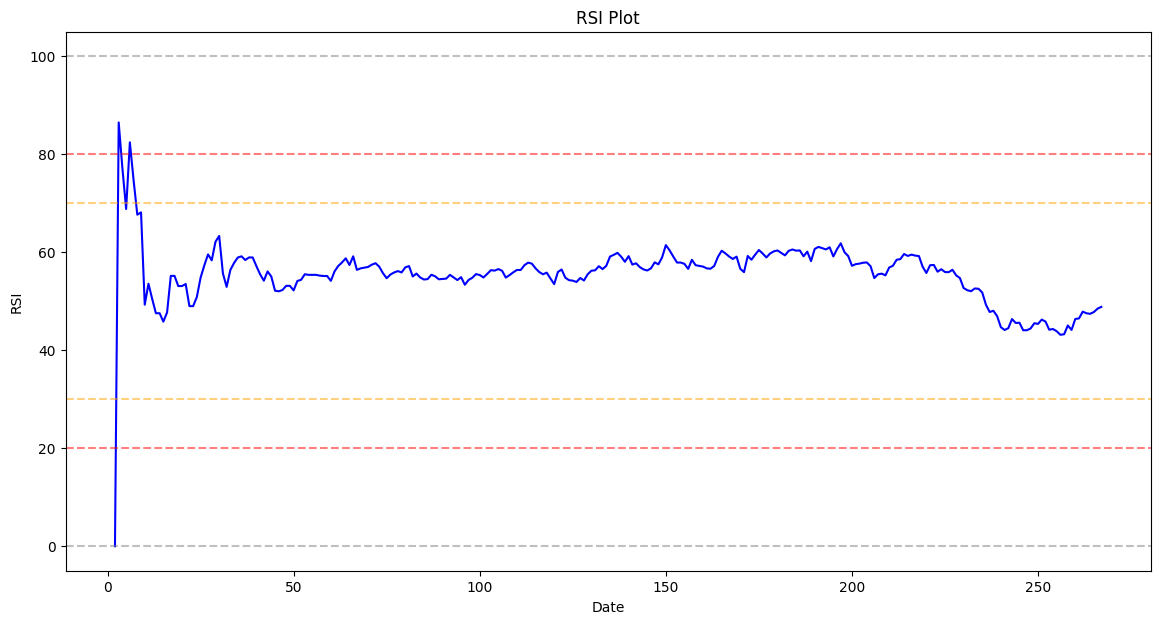

In [6]:
import pandas as pd
import numpy as np

def calculate_rsi(data, column_name='close', period=14):
    # Calculate price changes
    delta = data[column_name].diff(1)

    # Separate gains and losses
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)

    # Calculate average gains and losses over the specified period
    avg_gain = gains.rolling(window=period, min_periods=1).mean()
    avg_loss = losses.rolling(window=period, min_periods=1).mean()

    # Calculate relative strength (RS)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    # Add RSI to the DataFrame
    data['RSI'] = rsi

    return data

data_rsi = calculate_rsi(df_tpb, 'close', 90)
print(data_rsi.head())

# Visualize RSI

def visualize_rsi(data):
    # Plot the RSI data
    plt.figure(figsize=(14,7))
    plt.plot(data.index, data['RSI'], label='RSI', color='blue')
    
    # Add overbought and oversold lines
    plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
    plt.axhline(20, linestyle='--', alpha=0.5, color='red')
    plt.axhline(30, linestyle='--', alpha=0.5, color='orange')
    plt.axhline(70, linestyle='--', alpha=0.5, color='orange')
    plt.axhline(80, linestyle='--', alpha=0.5, color='red')
    plt.axhline(100, linestyle='--', alpha=0.5, color='gray')
    
    # Add title and labels
    plt.title('RSI Plot')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    
    # Show the plot
    plt.show()

visualize_rsi(data_rsi)

## MACD

https://www.finhay.com.vn/duong-macd

- Khi sự hội tụ xảy ra, tức là EMA (12) VÀ EMA (26) di chuyển lại gần nhau, MACD tiến gần đến đường Zero. 
- Nếu MACD cắt lên đường Zero => MACD từ âm (-) chuyển sang dương (+) => đường EMA(12) nằm trên EMA(26) => Giá trị đường MACD sẽ tăng lên khi EMA ngắn hơn phân kỳ với EMA dài hơn => Đà tăng đang lên.
- Ngược lại, Khi MACD cắt xuống đường Zero => MACD từ dương (+) chuyển sang âm (-) => EMA 12 ngày nằm dưới EMA 26 ngày => Giá trị âm của MACD sẽ tăng lên khi EMA ngắn hơn phân kỳ xa hơn EMA dài hơn => Đà giảm đang mạnh lên.


Certainly! Let's walk through a simple example of calculating the Exponential Moving Average (EMA) for a series of closing prices.

Suppose we have a closing price time series for a stock for the first five days:

P = [10, 12, 15, 14, 16]

Let's calculate a 3-day EMA using the formula:

$$
\alpha = \frac{2}{\text{Period} + 1} = \frac{2}{3 + 1} = \frac{1}{2}
$$

1. **Initial SMA (Simple Moving Average) for the first 3 days:**
$$
SMA_3 = \frac{10 + 12 + 15}{3} = \frac{37}{3} \approx 12.33
$$

1. **Calculate the first EMA (for the fourth day):**
$$
EMA_4 = \frac{1}{2} \cdot 14 + \left(1 - \frac{1}{2}\right) \cdot 12.33
$$

Simplifying this gives us:

$$
EMA_4 = 0.5 \cdot 14 + 0.5 \cdot 12.33 = 7 + 6.165 = 13.165
$$


1. **Calculate the next EMA (for the fifth day):**
$$
EMA_5 = \frac{1}{2} \cdot 16 + \left(1 - \frac{1}{2}\right) \cdot 13.165
$$

   Simplifying this gives us:
$$
EMA_5 = 0.5 \cdot 16 + 0.5 \cdot 13.165 = 8 + 6.5825 = 14.5825
$$

So, the 3-day EMA values for the given closing prices are approximately:

$$
EMA = [12.33, 13.165, 14.5825]
$$


This process continues for subsequent days, with each new EMA calculated based on the previous EMA and the current closing price, giving more weight to recent prices in the calculation.

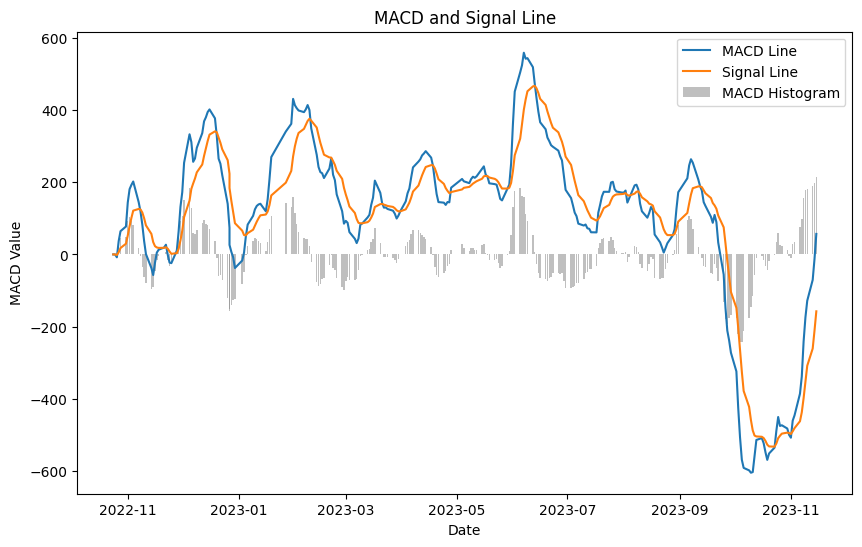

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate Short-term Exponential Moving Average (EMA)
    short_ema = data['close'].ewm(span=short_window, adjust=False).mean()

    # Calculate Long-term Exponential Moving Average (EMA)
    long_ema = data['close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD Line
    data['MACD'] = short_ema - long_ema

    # Calculate Signal Line
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD Histogram
    data['MACD_Histogram'] = data['MACD'] - data['Signal_Line']

    return data

def draw_macd(df):
    df_macd = calculate_macd(df)
    # Plotting MACD and Signal Line
    plt.figure(figsize=(10, 6))
    plt.plot(df_macd['time'], df_macd['MACD'], label='MACD Line')
    plt.plot(df_macd['time'], df_macd['Signal_Line'], label='Signal Line')
    plt.bar(df_macd['time'], df_macd['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.5)

    plt.title('MACD and Signal Line')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.show()

draw_macd(df_tpb)


In [8]:
import pandas as pd
import plotly.graph_objects as go

def calculate_stochastic(data, high_col='high', low_col='low', close_col='close', period=14, k_smooth=3, d_smooth=3):
    # Calculate %K
    data['%K'] = ((data[close_col] - data[low_col].rolling(window=period).min()) / 
                   (data[high_col].rolling(window=period).max() - data[low_col].rolling(window=period).min())) * 100

    # Smooth %K to get %D
    data['%D'] = data['%K'].rolling(window=k_smooth).mean()

    # Smooth %D to get a signal line
    data['%D_Signal'] = data['%D'].rolling(window=d_smooth).mean()

    return data

def draw_stochastic(df):
    df_sto = calculate_stochastic(df)
    # Plotting Stochastic Oscillator using Plotly
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_sto['time'], y=df_sto['%K'], mode='lines', name='%K'))
    fig.add_trace(go.Scatter(x=df_sto['time'], y=df_sto['%D'], mode='lines', name='%D'))
    fig.add_trace(go.Scatter(x=df_sto['time'], y=df_sto['%D_Signal'], mode='lines', name='%D Signal Line'))

    fig.update_layout(title='Stochastic Oscillator', xaxis_title='Date', yaxis_title='Percentage', legend=dict(x=0, y=1, traceorder='normal'))

    fig.show()


draw_stochastic(df_tpb)


## Draw chart multi ticket for compare.

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_price_multi_ticker(tickers, num_days):
    df = pd.DataFrame()
    for ticker in tickers:
        df_ticker = get_stock_price(ticker, num_days)
        df_ticker['ticker'] = ticker
        df = df.append(df_ticker)

    return df


def draw_chart_muti_ticker(tickers, num_days):
    df = get_price_multi_ticker(tickers, num_days)

    # Create subplots
    fig = make_subplots(rows=2, cols=1)
    
    # Loop over tickers and add candlestick chart to subplot
    for i, ticker in enumerate(tickers, start=1):
        df_ticker = df[df['ticker'] == ticker]
        if i == 1:
            fig.add_trace(go.Candlestick(x=df_ticker['time'],
                                     open=df_ticker['open'],
                                     high=df_ticker['high'],
                                     low=df_ticker['low'],
                                     close=df_ticker['close'],
                                     name=ticker
                                    ),
                      row=1, col=1)
            # Add volume bar chart
            fig.add_trace(go.Bar(x=df_ticker['time'], y=df_ticker['volume'], marker=dict(color='blue'), name='Volume'),
                        row=2, col=1)
        else:
            fig.add_trace(go.Scatter(x=df_ticker['time'], y=df_ticker['close'], mode='lines',
                name=ticker),
              row=1, col=1)
    

    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()

# Get unique tickers
tickers = ['VPB', 'EIB', 'TPB']

draw_chart_muti_ticker(tickers, 90)

/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_49748/3603564768.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_49748/3603564768.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_49748/3603564768.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

